In [37]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [90]:
mag_ch = pd.read_csv('./magazine/final/magazine_ch_stickword.csv', encoding = 'utf-8', sep ='|')

In [136]:
before = pd.read_csv('./ch_before.csv', sep='|', encoding = 'utf-8')
after = pd.read_csv('./ch_after.csv', sep='|', encoding = 'utf-8')

In [137]:
# mag_ch['ADFN'] = mag_ch['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

before['ADFN'] = before['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')
after['ADFN'] = after['ADFN'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [138]:
mag_ch['ADFN'].head()

0                        [메탈, 레진, 귀고리, CHANEL, CHANEL]
1    [인스타그램, 에디터, 디자이너, 인, 플루, 계정, 막, 시작, 가을, 겨울, 상...
2                     [체인, 진주, 결합, 우아함을, CHANEL, 액세서리]
3    [주변, 친구, 좋아하고, 사고, 익숙한, 브랜드, 뭐, 있지, CHANEL, 에르...
4    [컬러, 블록, 조화로운, 부츠, CHANEL, CHANEL, 와인, 색, 하이, ...
Name: ADFN, dtype: object

### top50 리스트 생성

In [42]:
top500 = pd.read_csv('./magazine/final/ch_ADFN_rank_dropword.csv', sep='|', encoding = 'utf-8')

In [162]:
b_top500 = pd.read_csv('./ch_before_rank_df.csv', sep='|', encoding = 'utf-8')
a_top500 = pd.read_csv('./ch_after_rank_df.csv', sep='|', encoding = 'utf-8')

In [163]:
a_top500

,word,count
0,CHANEL,4126
1,컬러,385
2,트위드,385
3,블랙,343
4,스타일,341
...,...,...
495,부드러운,40
496,핫,40
497,세트,40
498,거나,39


In [164]:
top500

,word,count
0,CHANEL,5469
1,브랜드,921
2,KARL,882
3,쇼,735
4,모델,716
...,...,...
495,과정,55
496,스텔라,55
497,스톤,55
498,영향,55


In [165]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '슈트', '런웨이', '클래식', '여름']


### top100

In [166]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '슈트', '런웨이', '클래식', '여름', '워치', '코트', '부츠', '팔레', '봄', '사랑', '로고', '향수', '크리에이티브', '핑크', '대표', '가을', '의상', '무대', '패턴', '겨울', '데님', '라인', '상징', '퍼렐', '다이아몬드', '책', '체인', '배우', '표현', '캠페인', '실루엣', '뉴욕', '향', '액세서리', '분위기', '스타일링', '미국', '하이', '칼', '트렌드', '자수', '사이즈', '남성', '매장', '제니', '미니', '가브리엘', '레드', '한국', '광고', '느낌', '크러쉬', '참석', '형태']


In [167]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '슈트', '런웨이', '클래식', '여름', '워치', '코트', '부츠', '팔레', '봄', '사랑', '로고', '향수', '크리에이티브', '핑크', '대표', '가을', '의상', '무대', '패턴', '겨울', '데님', '라인', '상징', '퍼렐', '다이아몬드', '책', '체인', '배우', '표현', '캠페인', '실루엣', '뉴욕', '향', '액세서리', '분위기', '스타일링', '미국', '하이', '칼', '트렌드', '자수', '사이즈', '남성', '매장', '제니', '미니', '가브리엘', '레드', '한국', '광고', '느낌', '크러쉬', '참석', '형태', '꽃', '셔츠', '서울', '여행', '연상', '이야기', '마지막', '화려한', '모자', '이미지', '수트', '코드', '스니커즈', '프린트', '니트', '특별한', '발표', '디테일', '동시', '무드', '스타', '영국', '의미', '전시', '활용', '공간', '명품', '행사', '탄생', '사이', '뷰티', '아름다', '시계', '장인', '진주', '강조', '빛', '트', '현지', '여러', '여자', '핸드백', '빈티지', 'CELINE', '모양', '우아한', '지난해', '삶', '없다', '게', '존재', '벨트', '포인트', '보그',

In [168]:
b_top200 = []
for i in range(200):
    b_top200.append(b_top500.loc[i, 'word'])
    
print(len(b_top200))
print(b_top200)

200
['CHANEL', '스타일', '주얼리', '트위드', '블랙', '컬러', '영화', '재킷', '향수', '슈즈', '옷', '전시', '코트', '아이템', '영감', '화이트', '다이아몬드', '다양한', '하우스', '슈트', '골드', '가죽', '가을', '겨울', '매력', '럭셔리', 'HAUTE', '프랑스', '부츠', '여름', '팬츠', '코드', '하이', '무대', '향', '핑크', '봄', '패턴', '밀', '상징', '크루즈', '호텔', '진주', '광고', '배우', '의상', '캠페인', '스커트', '로고', '패션쇼', '분위기', '여자', '체인', '팔레', '남성', '공방', '가방', '디렉터', '표현', '사랑', '클래식', '스타', '서울', '런웨이', '모티프', '행사', '주인공', '느낌', '티셔츠', '대표', '참석', '한국', '연상', '목걸이', '시계', '콜레트', '데님', '크리에이티브', '미국', '뮤즈', '라인', '고대', '그리스', '지드래곤', '카라', '이미지', '프리', '메탈', '매장', '워치', '현장', '스트리트', '액세서리', '아이콘', '빛', '트렌드', '기자', '비통', '부', '꽃', '유명', '루이', '역사', '책', '프린트', '마지막', '강조', '릴리', '영국', '우아한', '시크', '모양', '레이스', '레드', '아티스트', '공간', '뉴욕', '보그', '디테일', '귀고리', '발', '실루엣', '창조', '퍼렐', '화려한', '스토어', '리츠', '화인', '다시', '마드모아젤', '베', '셔츠', '미니', '아름다', '출신', '스틸', '유행', '샌들', '스튜어트', '미래', '의미', '이야기', '대중', '인스타그램', '크리스틴', '출시', '머리', '삶', '적', '없다', '거리', '비', '어깨', 'CELINE', '동시', '옐로',

In [169]:
a_top200 = []
for i in range(200):
    a_top200.append(a_top500.loc[i, 'word'])
    
print(len(a_top200))
print(a_top200)

200
['CHANEL', '컬러', '트위드', '블랙', '스타일', '재킷', '하우스', '공방', '아이템', '주얼리', '화이트', '크루즈', '럭셔리', '다양한', '옷', '디렉터', '영감', '스커트', '프랑스', '매력', '가방', '패션쇼', '골드', '영화', '런웨이', '클래식', '워치', '팬츠', 'HAUTE', '가죽', '슈즈', '팔레', '사랑', '슈트', '여름', '크리에이티브', '봄', '로고', '부츠', '대표', '제니', '퍼렐', '칼', '핑크', '의상', '스타일링', '데님', '라인', '책', '실루엣', '사이즈', '뉴욕', '코트', '패턴', '무대', '액세서리', '자수', '표현', '체인', '미국', '가을', '상징', '트렌드', '겨울', '미니', '배우', '분위기', '캠페인', '매장', '수트', '크러쉬', '레드', '향수', '명품', '형태', '여행', '스니커즈', '향', '남성', '리얼', '니트', '하이', '셔츠', '특별한', '모자', '꽃', '활용', '이야기', '발표', '무드', '화려한', '한국', '빈티지', '사이', '동시', '마지막', '느낌', '장인', '다이아몬드', '참석', '지난해', '디테일', '의미', '프린트', '온라인', '뷰티', '탄생', '이미지', '트', '여러', '연상', '서울', '핸드백', '영국', '입니다', '웨어', '존재', '공간', '현지', '더욱', '보이', '아름다', '광고', '쇼츠', '온', '게', '스튜디오', '벨트', '세상', '포인트', 'PVC', '바자', 'CELINE', '협업', '삶', '영상', '없다', '피날레', '강조', '좋은', '늘', '오픈', '감', '인상', '뿐', '과거', '빛', '모양', '우아한', '기억', '스타', '적', '슬릿', '스키', '블루', '아주', 'FW', '루이비

In [170]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500)

500
['CHANEL', '브랜드', 'KARL', '쇼', '모델', '장식', '백', '그녀', '드레스', '파리', '여성', '스타일', '룩', '트위드', '컬러', '디자이너', '블랙', 'COUTURE', '재킷', '디자인', '주얼리', '코코', '하우스', '아이템', '세계', '화이트', 'GABRIELLE', '공방', '옷', '럭셔리', '다양한', '크루즈', 'VIRGINIE', '영감', '영화', '디렉터', '프랑스', '매력', '슈즈', '스커트', '골드', '가죽', '팬츠', 'HAUTE', '패션쇼', '가방', '슈트', '런웨이', '클래식', '여름', '워치', '코트', '부츠', '팔레', '봄', '사랑', '로고', '향수', '크리에이티브', '핑크', '대표', '가을', '의상', '무대', '패턴', '겨울', '데님', '라인', '상징', '퍼렐', '다이아몬드', '책', '체인', '배우', '표현', '캠페인', '실루엣', '뉴욕', '향', '액세서리', '분위기', '스타일링', '미국', '하이', '칼', '트렌드', '자수', '사이즈', '남성', '매장', '제니', '미니', '가브리엘', '레드', '한국', '광고', '느낌', '크러쉬', '참석', '형태', '꽃', '셔츠', '서울', '여행', '연상', '이야기', '마지막', '화려한', '모자', '이미지', '수트', '코드', '스니커즈', '프린트', '니트', '특별한', '발표', '디테일', '동시', '무드', '스타', '영국', '의미', '전시', '활용', '공간', '명품', '행사', '탄생', '사이', '뷰티', '아름다', '시계', '장인', '진주', '강조', '빛', '트', '현지', '여러', '여자', '핸드백', '빈티지', 'CELINE', '모양', '우아한', '지난해', '삶', '없다', '게', '존재', '벨트', '포인트', '보그',

### top50만 남기기

In [171]:
len(mag_ch)

1450

In [172]:
top50_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [173]:
top100_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [174]:
top200_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [175]:
b_top200_word = []
for i in range(len(before)):
    w=[]
    for word in before.loc[i, 'ADFN']:
        if word in b_top200:
            w.append(word)
    b_top200_word.append(w)

In [176]:
a_top200_word = []
for i in range(len(after)):
    w=[]
    for word in after.loc[i, 'ADFN']:
        if word in a_top200:
            w.append(word)
    a_top200_word.append(w)

In [177]:
top500_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### item 남기기

In [178]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [179]:
item_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in item:
            w.append(word)
    item_word.append(w)

### top100이면서 item이 아닌 것

In [180]:
top100_not_item_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            if word not in item:
                w.append(word)
    top100_not_item_word.append(w)

In [54]:
len(top100_not_item_word)

1450

In [55]:
top100_not_item_word[1]

['디자이너',
 '가을',
 '겨울',
 '스타일링',
 '모델',
 'CHANEL',
 '클래식',
 '룩',
 'CHANEL',
 '여성',
 'CHANEL',
 '가브리엘',
 '디자인',
 '디자인',
 '사랑',
 '사랑',
 '사랑',
 '라인',
 '라인',
 '클래식',
 '라인',
 'CHANEL']

### top100이면서 common이 아닌 것

In [56]:
common = ['브랜드',
 '쇼',
 '모델',
 '장식',
 '드레스',
 '파리',
 '여성',
 '스타일',
 '컬러',
 '디자이너',
 '블랙',
 '재킷',
 '아이템',
 '옷',
 '디렉터',
 '팬츠']


In [57]:
top100_not_common_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            if word not in common:
                w.append(word)
    top100_not_common_word.append(w)

### top100이면서 common/item이 아닌 것

In [58]:
top100_not_common_item_word = []
for i in range(len(mag_ch)):
    w=[]
    for word in mag_ch.loc[i, 'ADFN']:
        if word in top100:
            if word not in common:
                if word not in item:
                    w.append(word)
    top100_not_common_item_word.append(w)

In [59]:
len(top50_word)

1450

In [60]:
top50_word[:5]

[['CHANEL', 'CHANEL'],
 ['디자이너',
  '가방',
  '모델',
  '옷',
  'CHANEL',
  '클래식',
  '백',
  '팬츠',
  '룩',
  '가방',
  'CHANEL',
  '여성',
  'CHANEL',
  '디자인',
  '디자인',
  '옷',
  '재킷',
  '재킷',
  '재킷',
  '팬츠',
  '가방',
  '백',
  '백',
  '클래식',
  'CHANEL',
  '백'],
 ['CHANEL'],
 ['브랜드', 'CHANEL', '브랜드', '브랜드', '럭셔리', '브랜드', '럭셔리', '브랜드', '브랜드', 'CHANEL'],
 ['컬러', 'CHANEL', 'CHANEL']]

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [108]:
# 어프라이어리(Apriori)
from apyori import apriori

In [109]:
top50_word[0]

['CHANEL', 'CHANEL']

In [181]:
# 지지도(support) : P(A∩B)
result = list(apriori(a_top200_word, min_support = 0.05))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
221,"(CHANEL, 스타일)",0.185782,"[((), (CHANEL, 스타일), 0.18578199052132702, 1.0)...",2
264,"(컬러, CHANEL)",0.181991,"[((), (컬러, CHANEL), 0.1819905213270142, 1.0), ...",2
201,"(CHANEL, 블랙)",0.181043,"[((), (CHANEL, 블랙), 0.18104265402843603, 1.0),...",2
252,"(재킷, CHANEL)",0.170616,"[((), (재킷, CHANEL), 0.17061611374407584, 1.0),...",2
229,"(아이템, CHANEL)",0.169668,"[((), (아이템, CHANEL), 0.16966824644549763, 1.0)...",2
171,"(CHANEL, 다양한)",0.164929,"[((), (CHANEL, 다양한), 0.16492890995260664, 1.0)...",2
273,"(트위드, CHANEL)",0.163033,"[((), (트위드, CHANEL), 0.16303317535545023, 1.0)...",2
295,"(CHANEL, 화이트)",0.158294,"[((), (CHANEL, 화이트), 0.15829383886255924, 1.0)...",2
285,"(하우스, CHANEL)",0.156398,"[((), (하우스, CHANEL), 0.15639810426540285, 1.0)...",2
186,"(매력, CHANEL)",0.136493,"[((), (매력, CHANEL), 0.13649289099526066, 1.0),...",2


### networkx 그래프 정의

In [182]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [183]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [184]:
pos = nx.spring_layout(G)

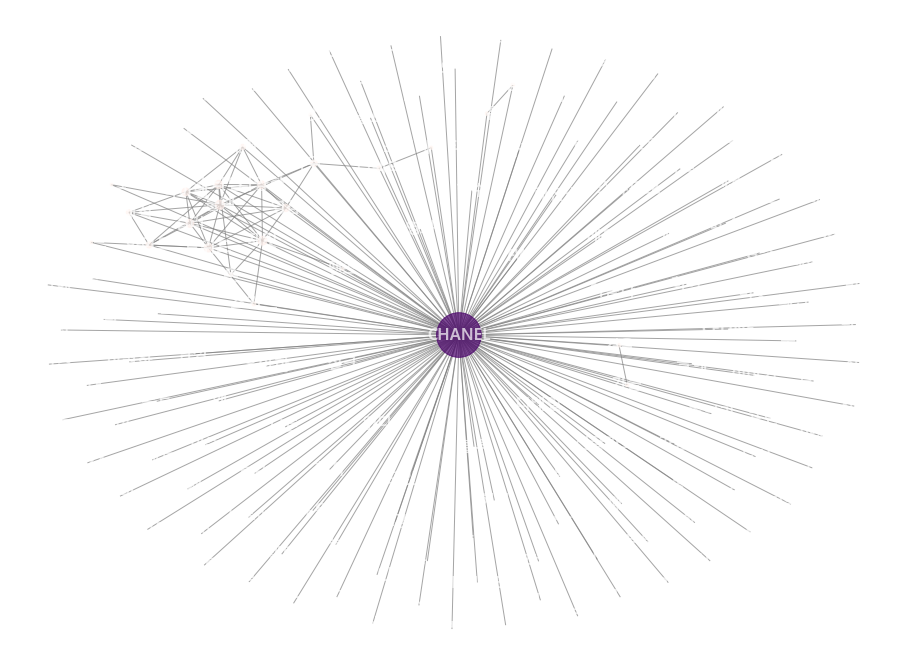

In [185]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_chanel_a_top200_min05.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [183]:
['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']

['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']